# Gravitational analogue of Faraday rotation by Piran and Safier Nature Paper
##  Geoff Cope
##  Univeristy of Utah
##  December 28, 2021

https://www.nature.com/articles/318271a0

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,theta,z,dt,dr,dtheta,dz = symbols( 't r theta z dt dr dtheta dz' ) 

In [4]:
psi = Function('psi')(t,r)
psi

In [5]:
omega = Function('omega')(t,r)
omega

In [6]:
gamma = Function('gamma')(t,r)
gamma

In [8]:
variables = Matrix( [t,r,theta,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣z⎦

In [10]:
differentials = Matrix( [dt,dr,dtheta,dz] ) 
differentials

⎡  dt  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣  dz  ⎦

In [11]:
lineElement = expand( exp(2*(gamma-psi)) * (dt**2 - dr**2) - exp(2*psi) * (dz + omega * dtheta)**2 - r**2 * exp(-2*psi) * dtheta**2 )
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(t, r)  -2⋅ψ(t, r)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(t, r)    2        2⋅ψ(t, r)    
⎢          0                        0             - r ⋅ℯ           - ω (t, r)⋅ℯ           -ω
⎢                                                                                           
⎢                                                                    2⋅ψ(t, r)              
⎣          0                        0                      -ω(t, r)⋅ℯ 

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡ 2⋅γ(t, r)  -2⋅ψ(t, r)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(t, r)    2        2⋅ψ(t, r)    
⎢          0                        0             - r ⋅ℯ           - ω (t, r)⋅ℯ           -ω
⎢                                                                                           
⎢                                                                    2⋅ψ(t, r)              
⎣          0                        0                      -ω(t, r)⋅ℯ 

In [15]:
from einsteinpy.symbolic import *

In [17]:
syms = sympy.symbols("t r theta z")
t,r,theta,z = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, r)) - ──(ψ(t, r))  ──(γ(t, r)) - ──(ψ(t, r))                                      
⎢⎢∂t            ∂t           ∂r            ∂r                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, r)) - ──(ψ(t, r))  ──(γ(t, r)) - ──(ψ(t, r))                                      
⎢⎢∂r            ∂r           ∂t            ∂t                         

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(t, r)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂r          
⎢───(γ(t, r)) - ───(γ(t, r)) - ───(ψ(t, r)) - 2⋅⎜──(ψ(t, r))⎟  + ───(ψ(t, r)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 r      
⎢∂r             ∂t             ∂r                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                         ∂              4⋅ψ(t, r) ∂        
⎢                                                         ──(γ(t, r)) 

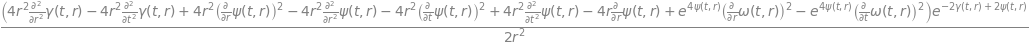

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [ ]:
einst = EinsteinTensor.from_metric(metric)
(einst.tensor())

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

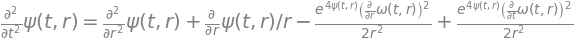

In [77]:
equation2 = Eq(diff(psi,t,t)  , expand(solve( Ric.tensor()[3,3], diff(psi,t,t) )[0]) ) 
equation2

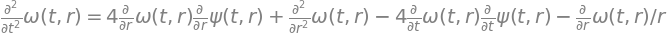

In [83]:
equation3 = Eq(diff(omega,t,t), solve( simplify( Ric.tensor()[2,2].args[1].subs(equation2.args[0],equation2.args[1]) ) , diff(omega,t,t) )[0] ) 
equation3

In [33]:
equation4 = Eq(diff(gamma,r),expand( solve( Ric.tensor()[0,0] + Ric.tensor()[1,1] , diff(gamma,r) )[0] ) )
equation4

In [26]:
equation5 = Eq(diff(gamma,t), solve( Ric.tensor()[0,1], diff(gamma,t) )[0] ) 
equation5

In [85]:
fieldEquations = Matrix([equation2,equation3,equation4,equation5])
fieldEquations

⎡                                                                        2                  
⎢                                  ∂              4⋅ψ(t, r) ⎛∂          ⎞     4⋅ψ(t, r) ⎛∂  
⎢      2              2            ──(ψ(t, r))   ℯ         ⋅⎜──(ω(t, r))⎟    ℯ         ⋅⎜──(
⎢     ∂              ∂             ∂r                       ⎝∂r         ⎠               ⎝∂t 
⎢    ───(ψ(t, r)) = ───(ψ(t, r)) + ─────────── - ───────────────────────── + ───────────────
⎢      2              2                 r                      2                           2
⎢    ∂t             ∂r                                      2⋅r                         2⋅r 
⎢                                                                                           
⎢                                                                                          ∂
⎢      2                                          2                                        ─
⎢     ∂               ∂           ∂              ∂               ∂    